In [ ]:
import math

import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
rng = np.random.default_rng(1)


N2 = 20000  # 2D sample size
N100 = 50000  # 100D sample size
d2 = 2
d100 = 100

In [17]:
X2 = rng.normal(size=(N2, d2))
X100 = rng.normal(size=(N100, d100))
r100 = np.linalg.norm(X100, axis=1)

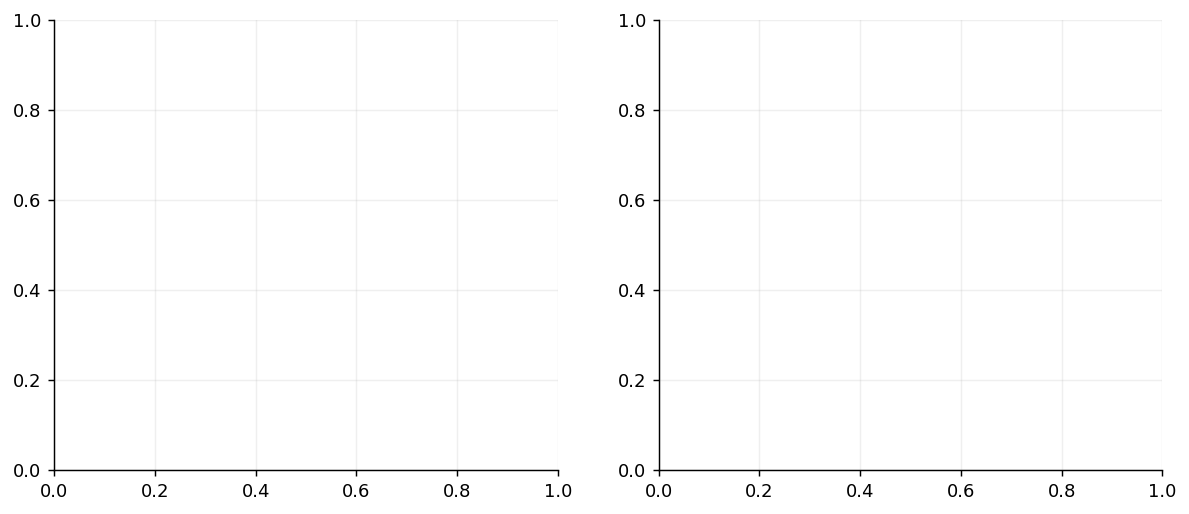

In [ ]:
plt.rcParams.update(
    {
        "axes.spines.top": False,
        "axes.spines.right": False,
        "axes.grid": True,
        "grid.alpha": 0.2,
        "figure.dpi": 130,
    }
)

fig, axes = plt.subplots(1, 2, figsize=(11, 4.5))

In [ ]:
# Panel A: 2D scatter with "typical radius" ring
ax = axes[0]
ax.scatter(X2[:, 0], X2[:, 1], s=3, alpha=0.15, color="#4c78a8", edgecolor="none")
ax.plot(0, 0, "o", color="#e45756", ms=6, label="mode (q=0)")

typical_r_2d = math.sqrt(d2)  # ~ sqrt(d)
circle = patches.Circle(
    (0, 0), typical_r_2d, fill=False, lw=2, ls="--", color="#72b7b2"
)
ax.add_patch(circle)

ax.set_aspect("equal", adjustable="box")
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_title("2D: samples form a loose ring away from the mode")
ax.legend(loc="upper right", frameon=False)
ax.text(2.0, 2.6, r"typical radius $\approx \sqrt{d} \approx 1.41$", color="#72b7b2")

ax.set_xlabel("q1")
ax.set_ylabel("q2")

Text(5.777777777777778, 0.5, 'q2')

In [ ]:
# Panel B: 100D norms histogram with radial density overlay
ax = axes[1]
bins = 60
hist_kwargs = dict(
    bins=bins, density=True, alpha=0.6, color="#4c78a8", edgecolor="white"
)
ax.hist(r100, **hist_kwargs)

(array([4.33532365e-04, 4.33532365e-04, 6.50298548e-04, 1.51736328e-03,
        4.76885602e-03, 5.63592075e-03, 9.32094585e-03, 1.32227371e-02,
        1.49568666e-02, 2.42778125e-02, 3.14310965e-02, 4.55208983e-02,
        7.32669697e-02, 8.38885127e-02, 1.15536375e-01, 1.41331551e-01,
        1.71678817e-01, 2.08745834e-01, 2.59902653e-01, 2.85914595e-01,
        3.38805543e-01, 3.97549179e-01, 4.35916793e-01, 4.86856846e-01,
        5.18071176e-01, 5.12435256e-01, 5.38230431e-01, 5.78115409e-01,
        5.55138194e-01, 5.34328640e-01, 5.32811277e-01, 5.13302320e-01,
        4.87940677e-01, 4.44153908e-01, 4.10555150e-01, 3.47692957e-01,
        3.07807979e-01, 2.65755340e-01, 2.32590114e-01, 2.03109913e-01,
        1.57372249e-01, 1.27458515e-01, 9.68944836e-02, 8.43220450e-02,
        7.10993079e-02, 4.72550278e-02, 2.99137332e-02, 2.64454743e-02,
        2.16766183e-02, 1.36562695e-02, 7.15328403e-03, 5.41915457e-03,
        4.76885602e-03, 3.68502510e-03, 3.46825892e-03, 1.734129

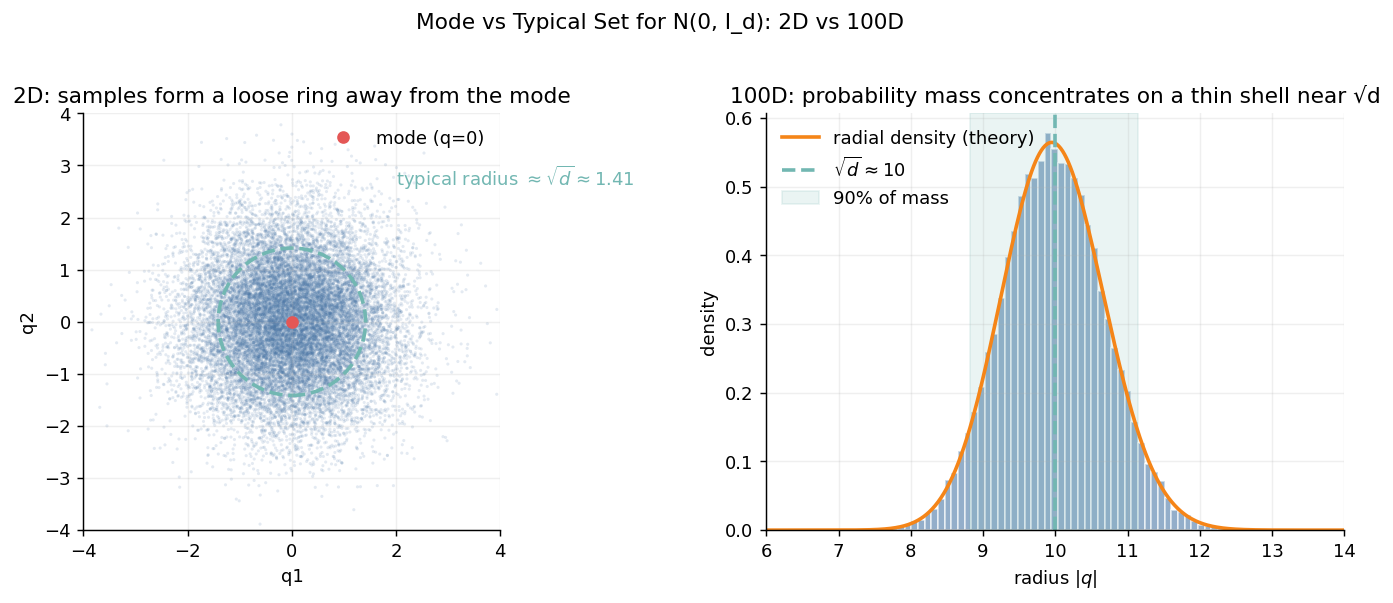

In [ ]:
# Overlay exact radial density for chi distribution (norm of N(0,I_d))
r_grid = np.linspace(6, 14, 600)
c = 1.0 / (2 ** (d100 / 2 - 1) * math.gamma(d100 / 2))  # normalization constant
f_r = c * (r_grid ** (d100 - 1)) * np.exp(-0.5 * r_grid**2)
ax.plot(r_grid, f_r, color="#f58518", lw=2, label="radial density (theory)")

# Annotations: typical radius and 90% shell
typical_r_100d = math.sqrt(d100)
ax.axvline(
    typical_r_100d, color="#72b7b2", lw=2, ls="--", label=r"$\sqrt{d}\approx 10$"
)

q05, q95 = np.quantile(r100, [0.05, 0.95])
ax.axvspan(q05, q95, color="#72b7b2", alpha=0.15, label="90% of mass")

ax.set_xlim(6, 14)
ax.set_title("100D: probability mass concentrates on a thin shell near √d")
ax.set_xlabel(r"radius $|q|$")
ax.set_ylabel("density")
ax.legend(frameon=False, loc="upper left")

fig.suptitle("Mode vs Typical Set for N(0, I_d): 2D vs 100D", y=1.02, fontsize=12)
fig.tight_layout()

# Save and show
# plt.savefig("gaussian_ring_2d_vs_100d.png", bbox_inches="tight")
plt.show()
fig